In [1]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append('../')
from src_experiment import get_storage_path, EstimateQuantities1Run, AverageEstimates
# from geobin import EstimateQuantities1Run, AveragedEstimates

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(35, dtype=np.int64), figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_storage_path("moons", model_name=model_name, dataset_name=dataset_name, noise_level=noise_level, run_number=int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


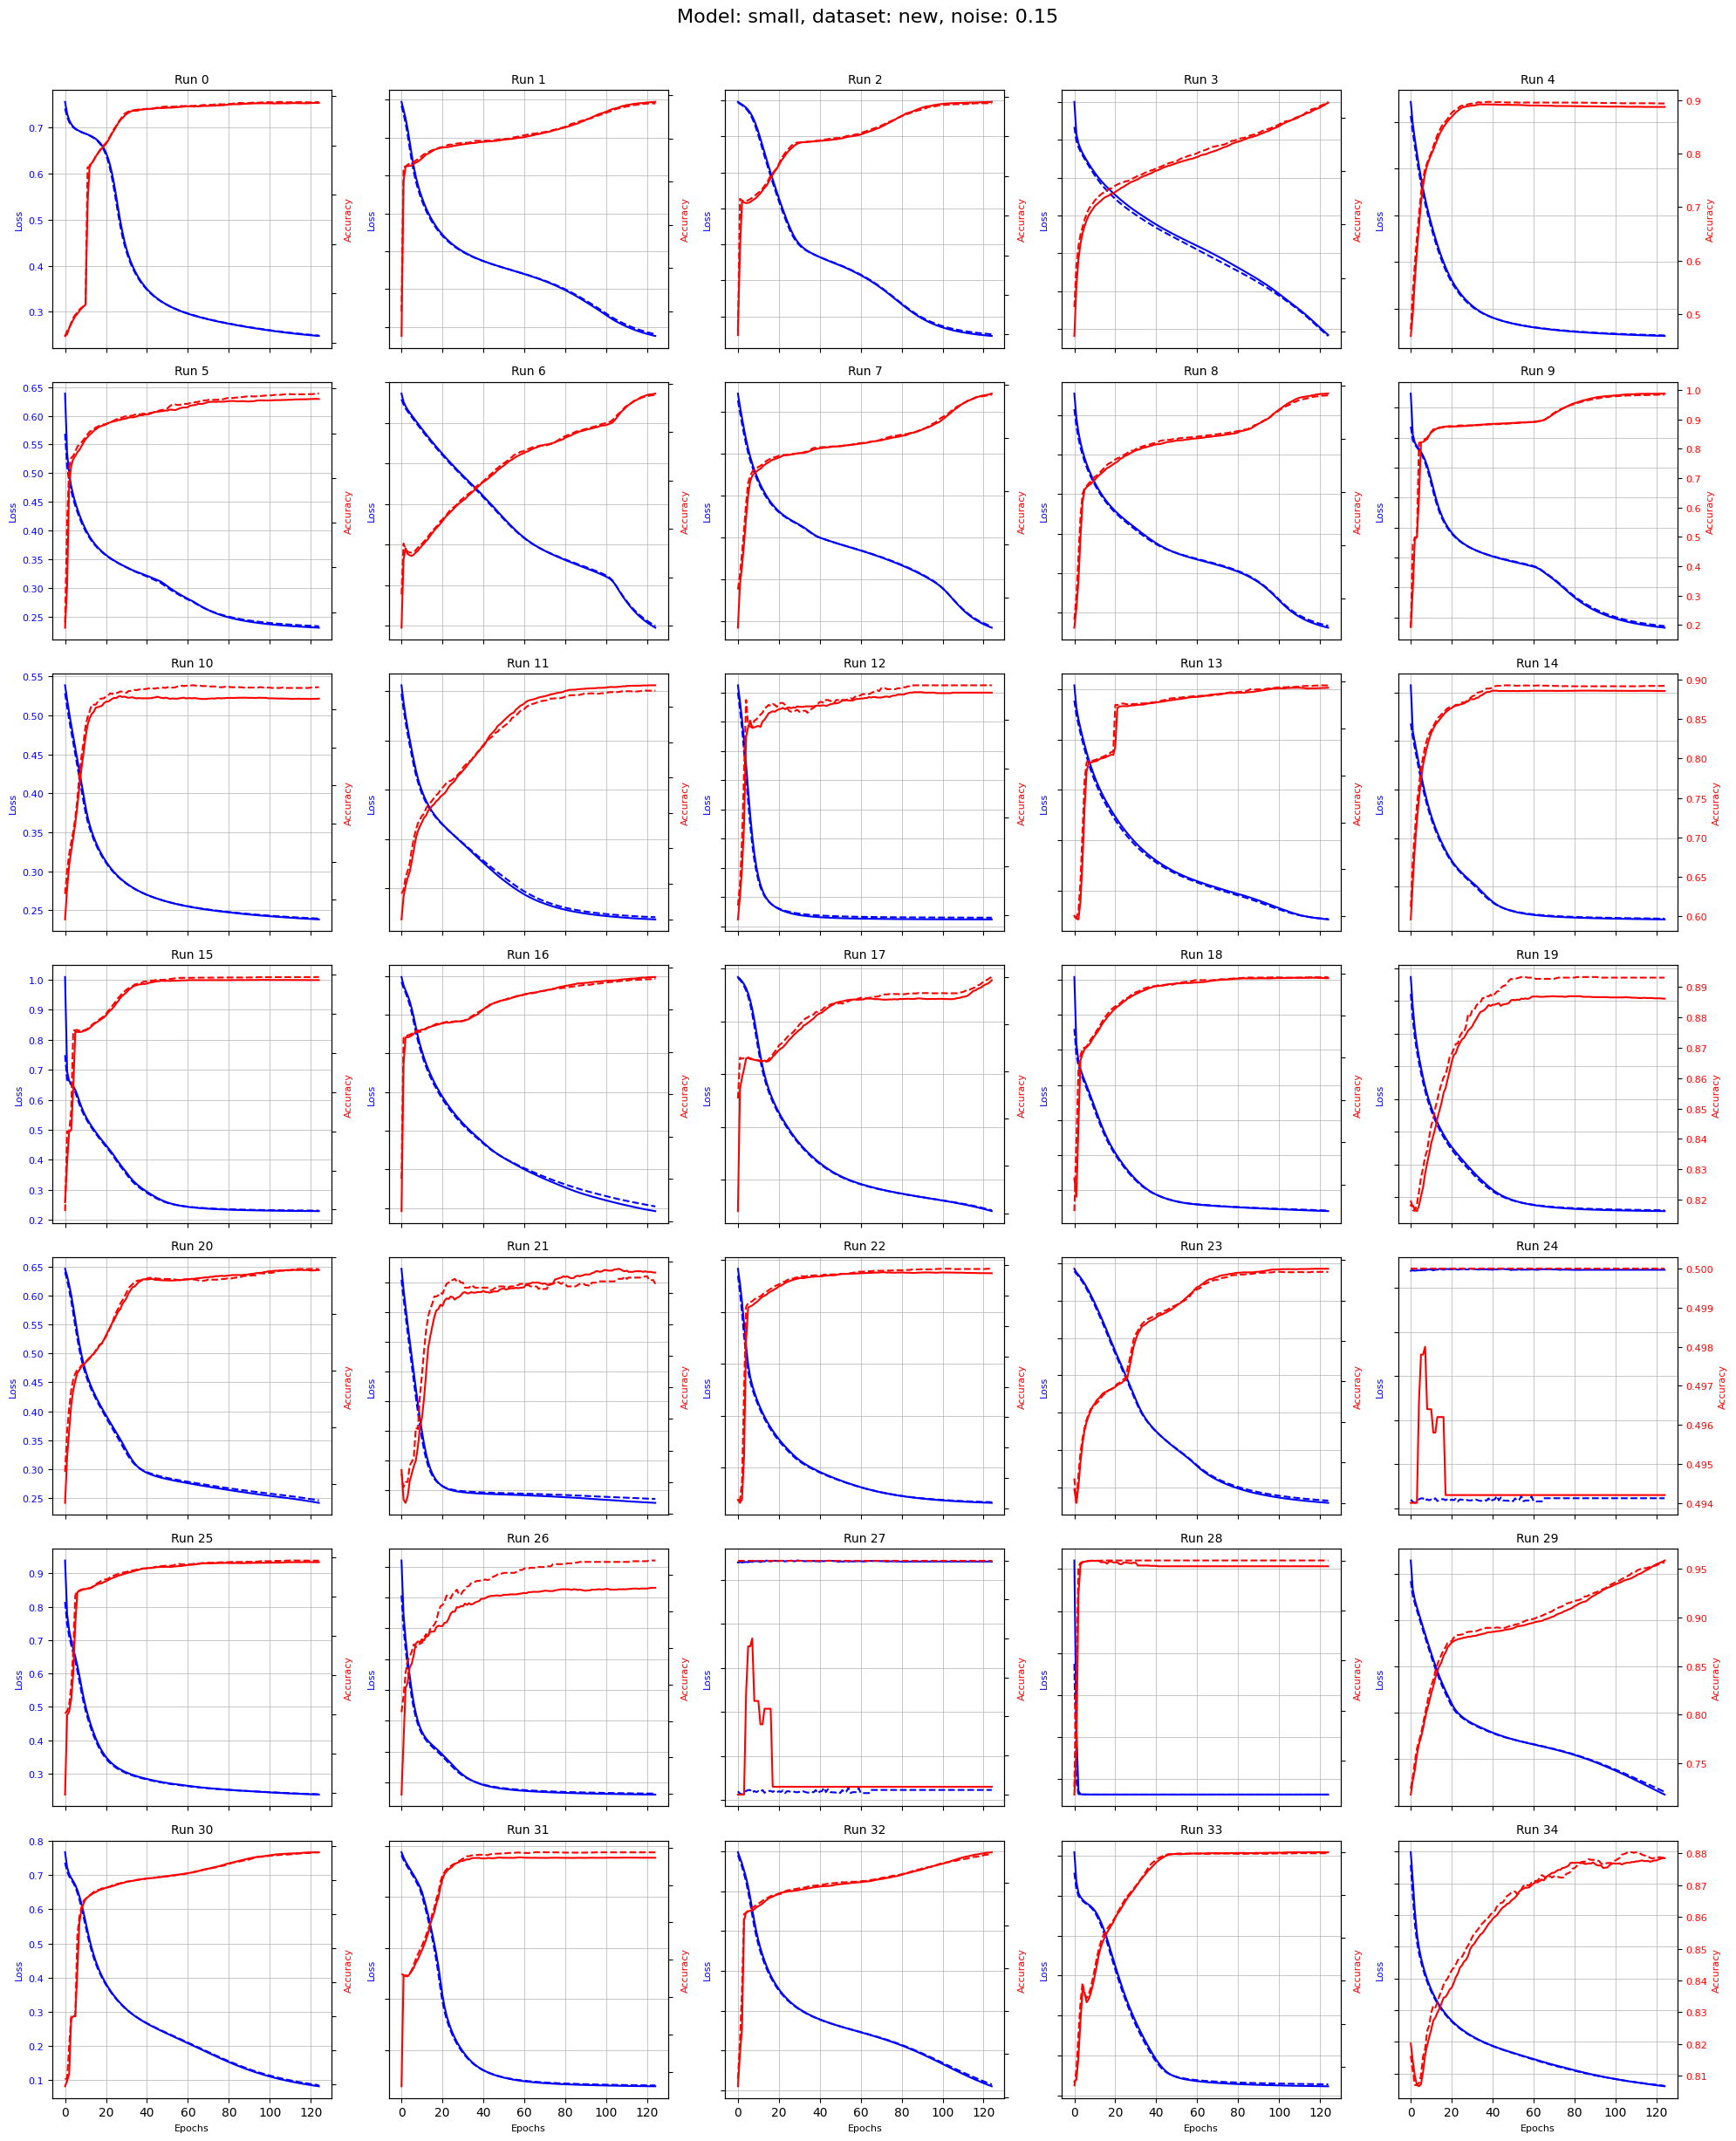

In [3]:
plot_multiple_runs_grid(model_name="small",
                        dataset_name="new",
                        noise_level=0.15)

In [4]:
def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(35, dtype=np.int64), figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_storage_path("moons", model_name=model_name, dataset_name=dataset_name, noise_level=noise_level, run_number=int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [5]:

first_run = EstimateQuantities1Run(get_storage_path("moons", model_name="small", dataset_name="new", noise_level=0.15, run_number=0))

In [6]:
MI = first_run.estimates["MI_KL"]
MI

,epoch,l1,l2,l3,l4
0,0,0.318716,0.320329,0.320392,0.320429
1,5,0.315851,0.323062,0.324545,0.324545
2,10,0.313772,0.317764,0.317764,0.317764
3,15,0.310403,0.313089,0.313089,0.335232
4,20,0.307975,0.309136,0.309136,0.336890
5,25,0.313062,0.313167,0.313283,0.344824
6,30,0.319660,0.319823,0.319823,0.352820
7,35,0.324769,0.325435,0.325843,0.360484
8,40,0.323257,0.324154,0.324735,0.368601
9,45,0.323134,0.325166,0.326603,0.370577


In [8]:
# first_run.calculate_estimates()
MI = first_run.estimates["MI_KL"]
MI

,epoch,l1,l2,l3,l4
0,0,0.318716,0.320329,0.320392,0.320429
1,5,0.315851,0.323062,0.324545,0.324545
2,10,0.313772,0.317764,0.317764,0.317764
3,15,0.310403,0.313089,0.313089,0.335232
4,20,0.307975,0.309136,0.309136,0.336890
5,25,0.313062,0.313167,0.313283,0.344824
6,30,0.319660,0.319823,0.319823,0.352820
7,35,0.324769,0.325435,0.325843,0.360484
8,40,0.323257,0.324154,0.324735,0.368601
9,45,0.323134,0.325166,0.326603,0.370577


In [9]:
import matplotlib.pyplot as plt

def plot_layers_exclude_last(df, lw=2):
    """
    Plot all layers except the last one on the same figure as functions of epoch.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with columns 'epoch' and layers like 'l1', 'l2', ...
    lw : float
        Line width for the curves.
    """
    # All columns except 'epoch' and the last layer
    layers = df.columns[1:-1]  # skip first (epoch) and last
    
    plt.figure(figsize=(10, 6))
    
    for layer in layers:
        plt.plot(df["epoch"], df[layer], lw=lw, label=layer)
    
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Layer values as a function of epoch (excluding last layer)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


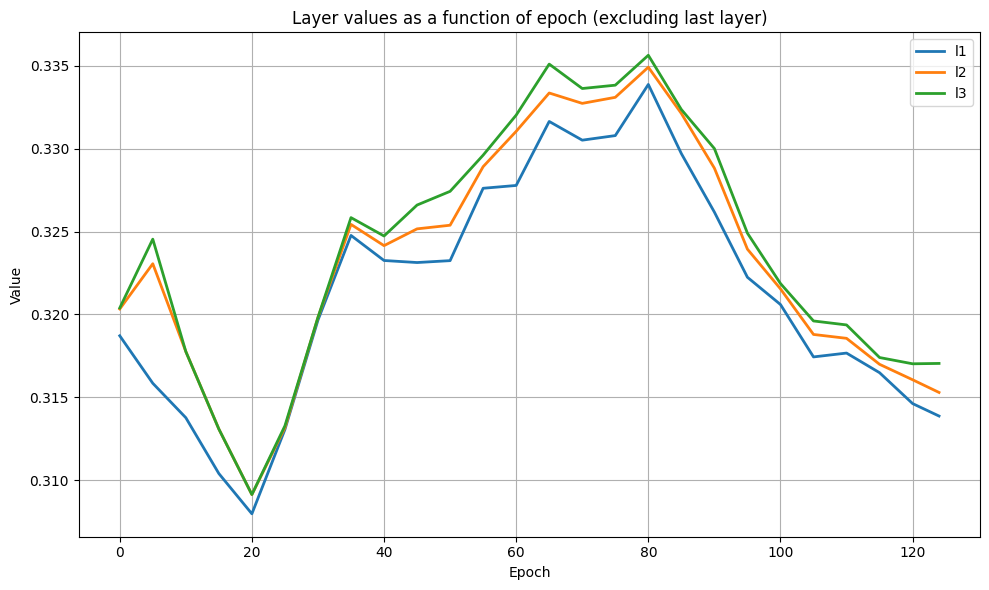

In [10]:
plot_layers_exclude_last(MI)

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multiple_runs_MI_layers_grid(
    model_name,
    dataset_name,
    noise_level,
    run_numbers=np.arange(35, dtype=np.int64),
    figsize=(20, 25),
    lw=1.5
):
    """
    Plot MI_KL layer-wise values (excluding last layer) for multiple runs in a grid.
    
    Each subplot corresponds to one run.
    Bottom row shows x-ticks.
    Leftmost column shows y-ticks.
    """

    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]

        # ---- Load and compute MI estimates for one run ----
        run = EstimateQuantities1Run(
            data_dir=get_storage_path("moons", model_name=model_name, dataset_name=dataset_name, noise_level=noise_level, run_number=int(run_number))
        )
        # run.calculate_estimates()
        df = run.estimates["MI_KL"]

        # All layers except 'epoch' and the last layer
        layers = df.columns[1:-1]

        # ---- Plot layers ----
        for layer in layers:
            ax.plot(df["epoch"], df[layer], lw=lw)

        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)

        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols

        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel("Epoch", fontsize=8)

        # Only first column keeps y-ticks
        if col != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("MI (KL)", fontsize=8)

        ax.tick_params(axis="both", labelsize=8)

    # Remove unused axes if run_numbers < grid size
    for j in range(len(run_numbers), n_rows * n_cols):
        fig.delaxes(axes[j])

    fig.suptitle(
        f"MI_KL across layers (excluding last)\n"
        f"Model: {model_name}, Dataset: {dataset_name}, Noise: {noise_level}",
        fontsize=16
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


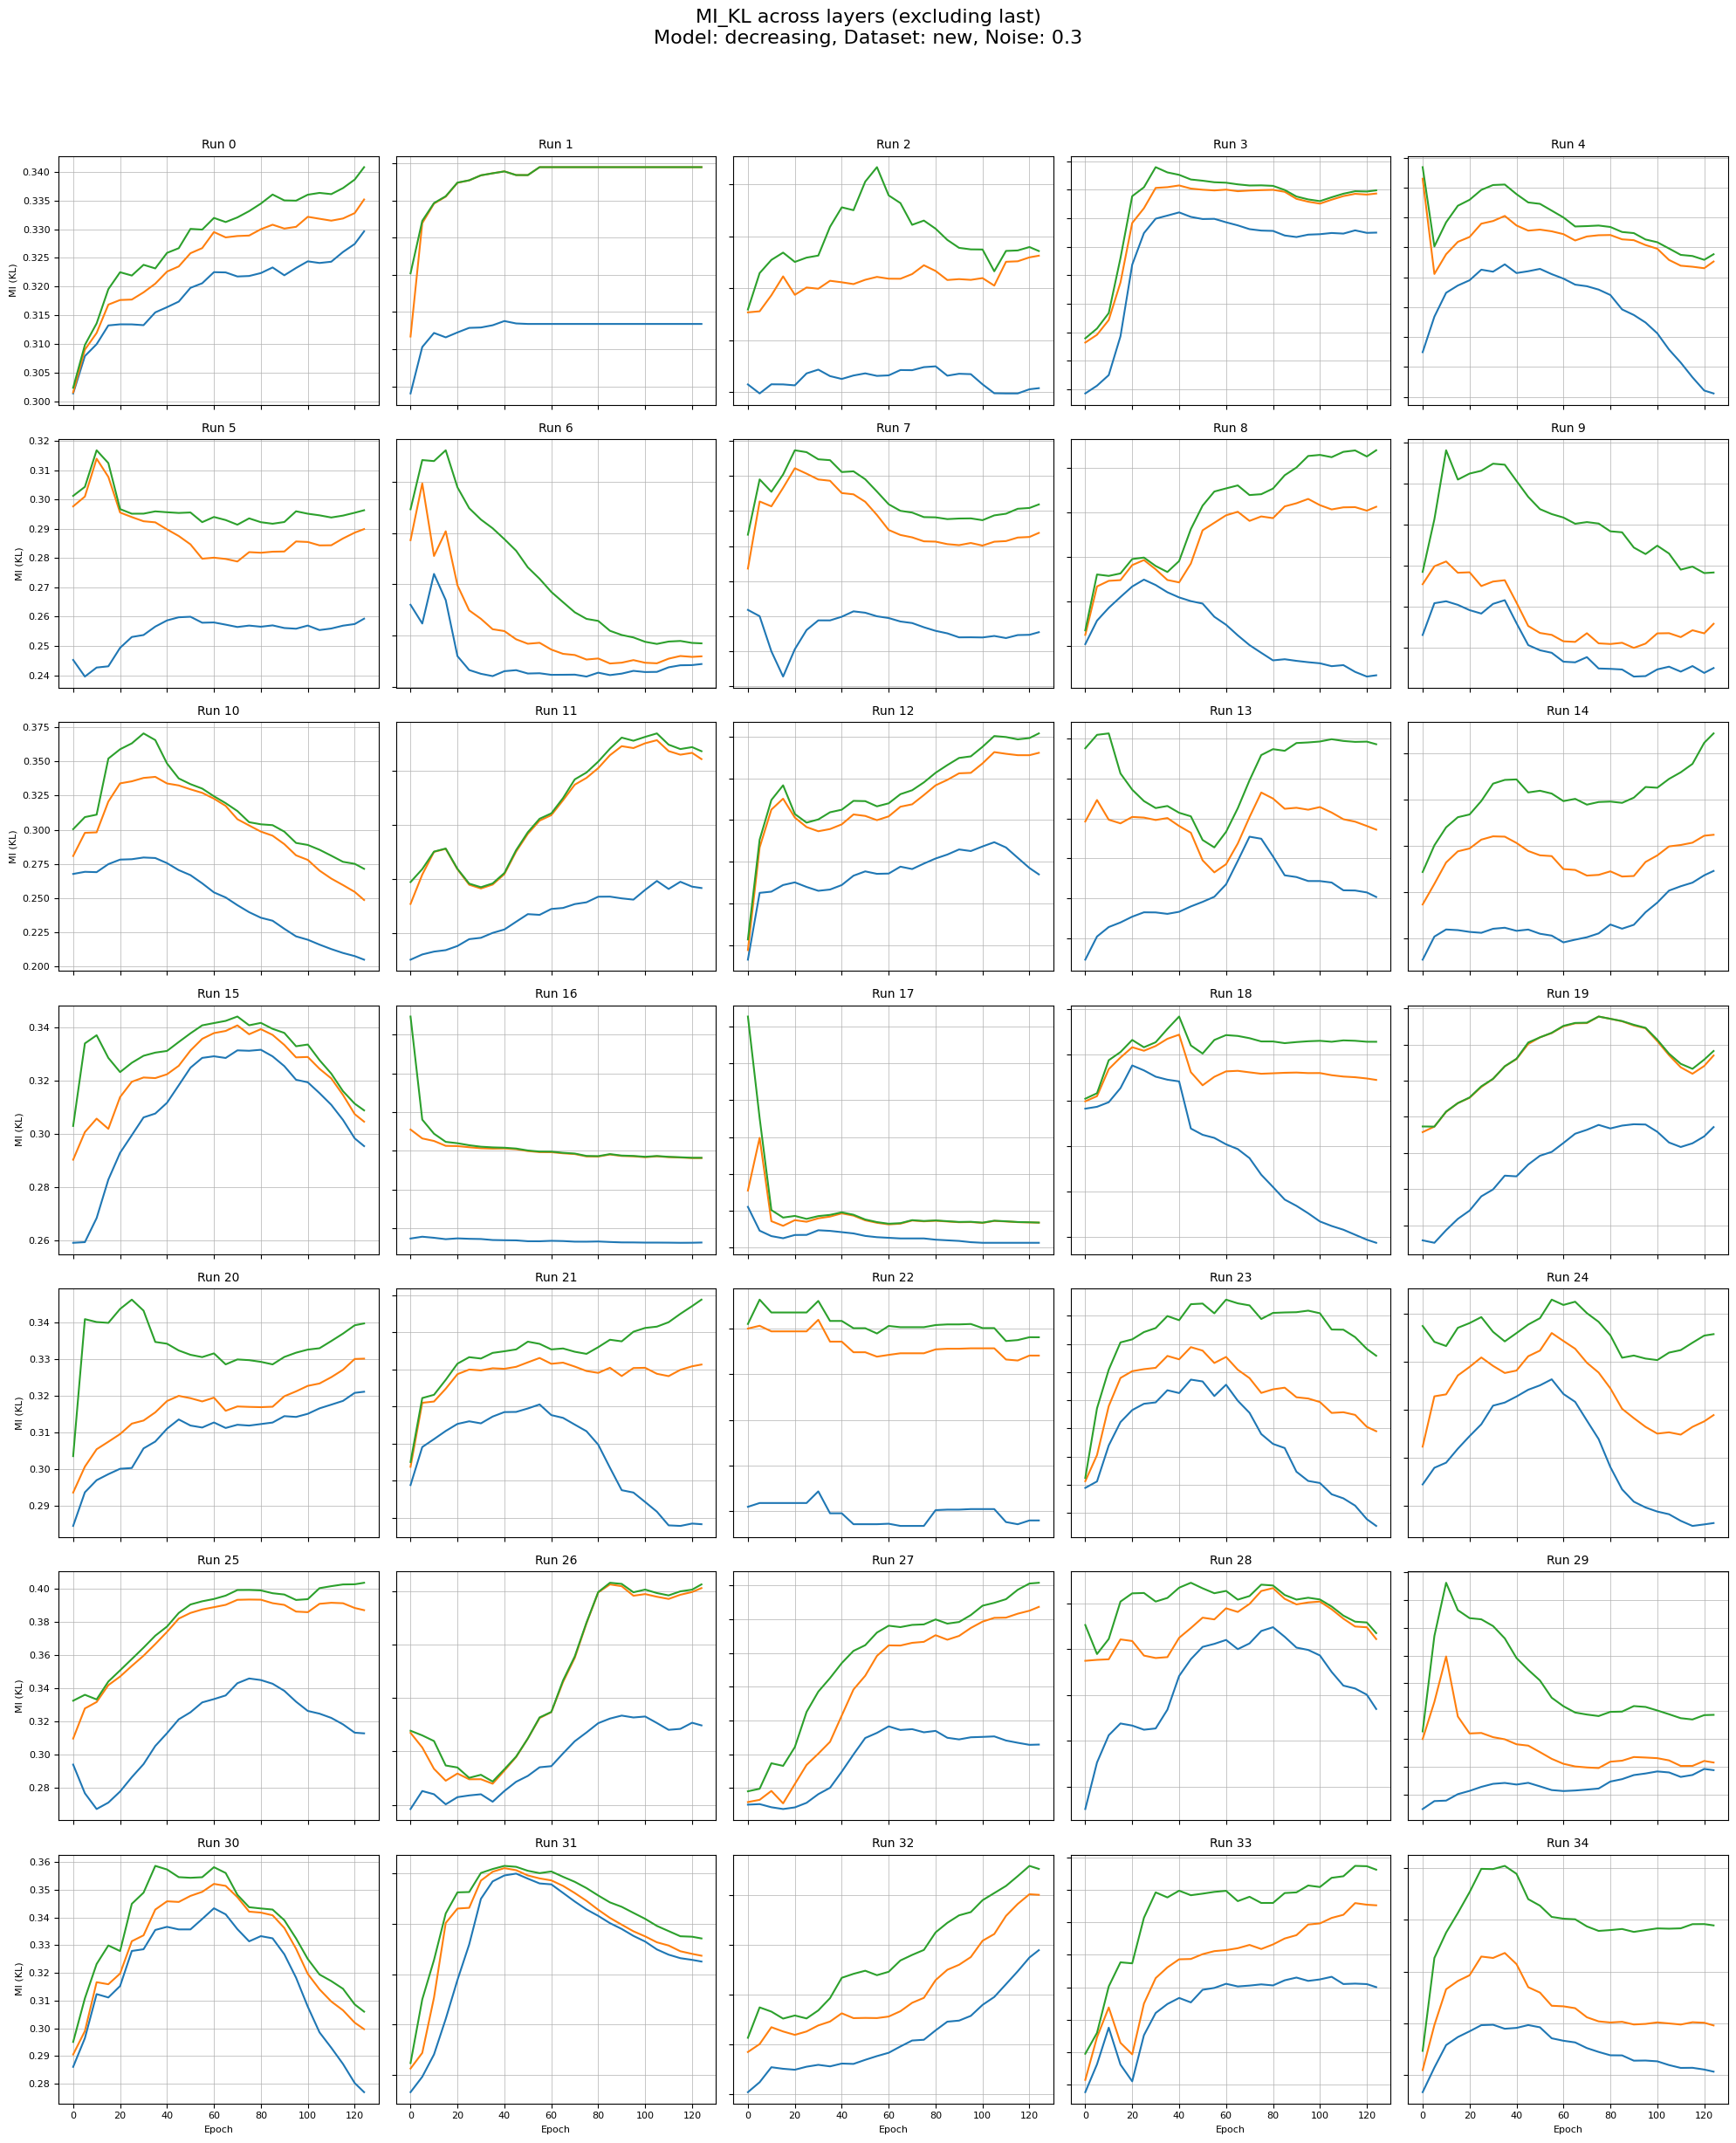

In [16]:
plot_multiple_runs_MI_layers_grid(
    model_name="decreasing",
    dataset_name="new",
    noise_level=0.3,
    run_numbers=np.arange(35)
)

In [17]:
avg1 = AverageEstimates([get_storage_path("moons", model_name="decreasing", dataset_name="new", noise_level=0.3, run_number=int(rn)) for rn in np.arange(35)])
agg = avg1.collect()

In [18]:
dfs = agg["MI_IS"]

In [19]:
# # dfs = avg1.individual_estimates["MI_IS"]set_name,
#             noise_level,
#             run_number,

In [20]:
all_runs = (
    pd.concat(dfs, keys=range(35), names=["run", "row"])
      .reset_index(level="run")
)


In [21]:
all_runs

,run,epoch,l1,l2,l3,l4
row,,,,,,
0,0,0,28.134327,35.530346,43.760422,47.284911
1,0,5,33.047365,45.537910,60.044079,66.027110
2,0,10,27.961588,45.148756,62.695101,70.015422
3,0,15,31.850949,51.562418,68.918544,82.527010
4,0,20,30.575973,49.044518,69.810694,88.942270
...,...,...,...,...,...,...
21,34,105,34.629850,58.360579,80.362361,104.230758
22,34,110,33.408834,59.230845,81.203919,102.739363
23,34,115,34.595148,61.381904,80.269400,102.267882


In [22]:
summary = (
    all_runs
    .groupby("epoch")[["l1", "l2", "l3", "l4"]]
    .agg(["mean", "std"])
)


In [23]:
summary

l1                   l2                    l3             \
            mean       std       mean        std       mean        std   
epoch                                                                    
0      29.560052  3.098829  54.898093  14.537286  74.639108  24.061414   
5      32.382290  4.450153  62.781576  14.812384  82.325571  22.796520   
10     33.889656  5.845055  65.142849  14.737497  84.871045  23.072001   
15     33.979516  5.010261  65.768194  13.694225  84.662233  21.667757   
20     34.664056  4.943320  66.614528  14.811981  85.150429  23.519783   
25     35.309769  5.558427  66.438773  15.462538  85.004345  23.529072   
30     35.787693  5.752085  67.944728  15.027882  87.131836  23.614635   
35     35.955500  5.780127  68.583088  16.431130  87.915946  24.381988   
40     36.405709  6.117652  68.749456  15.129861  88.297895  22.696424   
45     35.942722  6.276855  68.820163  16.356692  89.892792  23.866505   
50     35.502283  6.000392  68.465571  16.406043  88.925956  24.508436   
55     34.792968  6.227054  67.273479  16.268993  88.235108  25.423533   
60     34.648949  6.469867  67.725089  17.355234  89.371774  26.541172   
65     34.251669  6.522031  67.814816  16.843818  89.785202  26.123206   
70     34.645563  6.416719  68.934285  18.057072  91.049099  26.795269   
75     34.358201  5.966680  68.145998  17.206084  90.938231  27.318056   
80     34.697393  6.597843  68.888044  18.042088  90.797849  27.674879   
85     34.622157  6.783782  68.769345  18.470733  90.807021  27.621292   
90     34.554624  6.224273  68.927550  19.214156  90.626369  28.348640   
95     34.566621  6.272725  69.156243  19.091607  91.058602  28.784543   
100    34.390423  6.176433  68.763705  19.001645  90.957605  29.377647   
105    34.507314  6.027637  68.809032  19.335187  90.832471  29.377676   
110    34.250622  6.285173  68.356135  18.853491  90.177933  29.139362   
115    34.336222  6.285450  67.987336  17.605491  90.416862  28.421975   
120    34.309059  6.199180  68.265114  18.149129  90.166546  28.521429   
124    34.259182  6.103121  68.016079  18.623268  89.800701  29.776393   

               l4             
             mean        std  
epoch                         
0       89.114345  30.916604  
5       92.340749  26.626366  
10      94.431347  26.079553  
15      93.471224  24.049354  
20      94.010032  25.850359  
25      93.625566  26.072868  
30      96.688172  26.858674  
35      97.376266  27.140838  
40      97.399234  25.461310  
45      99.859511  26.412095  
50      98.674234  27.206624  
55      98.832774  28.053164  
60      99.966505  29.423734  
65     100.963170  29.403280  
70     102.248602  30.184497  
75     102.359200  31.424901  
80     102.469551  32.106171  
85     102.707662  32.302600  
90     103.269452  33.270532  
95     103.837178  33.776606  
100    103.794908  34.201111  
105    103.906096  34.043038  
110    103.139038  33.924395  
115    103.392912  33.363413  
120    103.082335  33.493651  
124    102.919718  34.792957

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_runs_with_mean_std(dfs, layers=None, alpha_runs=0.2, lw_runs=0.8, lw_mean=2.5):
    """
    Plot all runs as thin lines and overlay mean ± std.

    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per run, with columns ['epoch', 'l1', 'l2', ...]
    layers : list[str], optional
        Which layer columns to plot. Defaults to all except 'epoch'.
    alpha_runs : float
        Transparency of individual runs.
    lw_runs : float
        Line width of individual runs.
    lw_mean : float
        Line width of mean curve.
    """

    if layers is None:
        layers = [c for c in dfs[0].columns if c != "epoch"]

    # Stack runs
    all_runs = pd.concat(dfs, keys=range(len(dfs)), names=["run"])
    all_runs = all_runs.reset_index(level="run")

    for layer in layers:
        fig, ax = plt.subplots()

        # Plot individual runs
        for _, df in all_runs.groupby("run"):
            ax.plot(df["epoch"], df[layer], alpha=alpha_runs, lw=lw_runs)

        # Mean and std across runs
        stats = (
            all_runs
            .groupby("epoch")[layer]
            .agg(["mean", "std"])
            .reset_index()
        )

        ax.plot(stats["epoch"], stats["mean"], lw=lw_mean, label="mean")
        ax.fill_between(
            stats["epoch"],
            stats["mean"] - stats["std"],
            stats["mean"] + stats["std"],
            alpha=0.3,
            label="±1 std"
        )

        ax.set_xlabel("Epoch")
        ax.set_ylabel(layer)
        ax.set_title(f"{layer}: runs, mean ± std")
        ax.legend()
        ax.grid(True)

        plt.show()


In [25]:
# plot_runs_with_mean_std(dfs)

In [26]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_layer_means_same_figure(
    dfs,
    layers=None,
    lw_mean=2.5,
    alpha_std=0.25,
    show_std=True,
    logy=True
):
    """
    Plot mean (and optionally ± std) across runs for all layers
    in a single figure, with optional log-scale y-axis.

    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per run, with columns ['epoch', 'l1', 'l2', ...]
    layers : list[str], optional
        Which layer columns to plot. Defaults to all except 'epoch'.
    lw_mean : float
        Line width of mean curves.
    alpha_std : float
        Transparency of std shading.
    show_std : bool
        Whether to show ±1 std shading.
    logy : bool
        Whether to use logarithmic y-axis.
    """

    if layers is None:
        layers = [c for c in dfs[0].columns if c != "epoch"]

    # Stack runs
    all_runs = pd.concat(dfs, keys=range(len(dfs)), names=["run"])
    all_runs = all_runs.reset_index(level="run")

    fig, ax = plt.subplots(figsize=(10, 6))

    for layer in layers:
        stats = (
            all_runs
            .groupby("epoch")[layer]
            .agg(["mean", "std"])
            .reset_index()
        )

        # Mean curve
        ax.plot(
            stats["epoch"],
            stats["mean"],
            lw=lw_mean,
            label=layer
        )

        # Std shading
        if show_std:
            ax.fill_between(
                stats["epoch"],
                stats["mean"] - stats["std"],
                stats["mean"] + stats["std"],
                alpha=alpha_std
            )

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Value")
    ax.set_title("Layer-wise mean (± std) across runs")

    if logy:
        ax.set_yscale("log")

    ax.legend(title="Layer")
    ax.grid(True, which="both", lw=0.5)
    plt.tight_layout()
    plt.show()


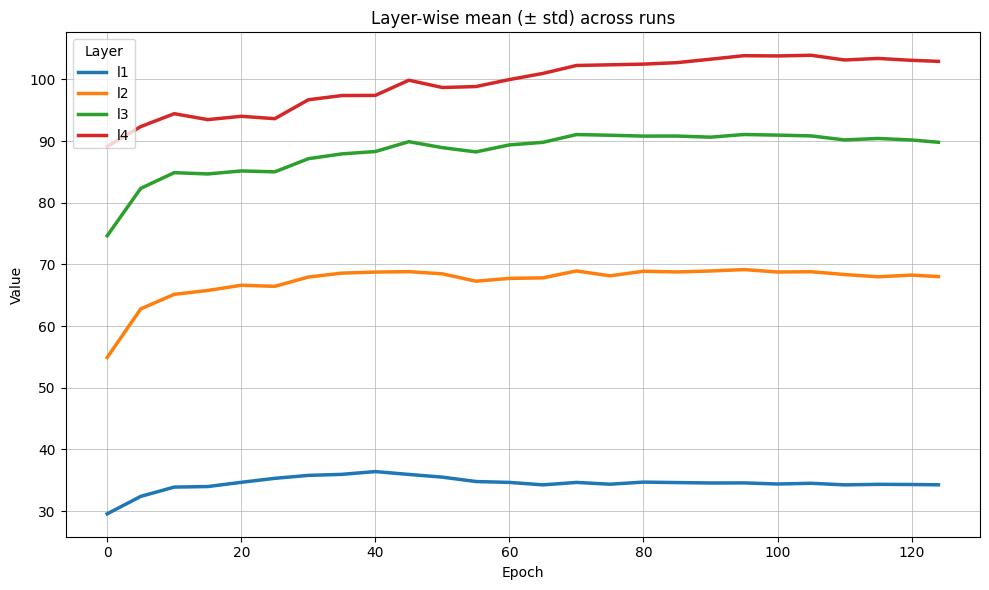

In [27]:
plot_layer_means_same_figure(
    dfs=dfs,          # list of MI_KL DataFrames
    show_std=False,
    logy=False
)
